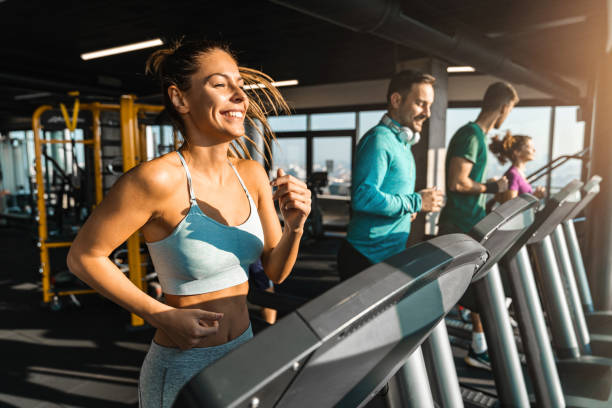

 # <ins>Business Problem: Aerofit</ins>

### ✅ Creating a customer profile : 
>This profile will tell us the details about the each category of treadmill we have. We will incorporate charts, tables and in depth analysis and will find out the relationship between products(treadmill) and other features.

# -------------------------------------------------------

### ✅ Two way Contingency Table:
><ins>The two way contingency table will enable us to answer the following business problem:-</ins><br><br>
<b>a) Joint Probability : P(No. of females purchased what kind of treadmill)</b>, Joint Probabilty refers to the event that occured together and in our data we have many instances where events are occuring together and answering those instances solves our business problem.<br><br>

><b>b) Marginal Probabilty : P(No. of females in our data), P(No. of males in our data), P(No. of types of treadmill we have in our data) and all</b>. Marginal Probability is basically all those events that don't depend on the condition of another outcome.<br><br>

><b>c) Conditonal Probabilty : P(No. of female who purchased treadmill A)</b>, Finding the probabilties given a condition.

# -------------------------------------------------------

# 1. <ins> Analysing the basic metrics</ins>

In [1]:
# loading the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
# loading the dataset
df = pd.read_csv('aerofit_treadmill.csv')
print(df.head())

  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   KP281   18    Male         14        Single      3        4   29562    112
1   KP281   19    Male         15        Single      2        3   31836     75
2   KP281   19  Female         14     Partnered      4        3   30699     66
3   KP281   19    Male         12        Single      3        3   32973     85
4   KP281   20    Male         13     Partnered      4        2   35247     47


In [3]:
# shape of dataset
print('The shape of the daatset is :',df.shape)

The shape of the daatset is : (180, 9)


In [4]:
# Data types
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [5]:
# finding the dtype and info 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
None


In [6]:
# columns with null values
df.columns[df.isnull().any()]

Index([], dtype='object')

### Observation:
> 1. There are no missing values in our dataset hence we do not need to remove or impute missing values.<br><br>
> 2. The following are categorical features :-<br>
    2.1 Product<br>
    2.2 Gender<br>
    2.3 MaritalStatus<br><br>
> 3. The following features can be converted into categories:-<br>
    3.1 Age<br>
    3.2 Income<br>
    3.3 Education

In [7]:
# Converting Age into categories:
print('Minimum age of customers are : ',df['Age'].min())
print('Maximum age of customers are : ',df['Age'].max())

Minimum age of customers are :  18
Maximum age of customers are :  50


In [8]:
# Categorising age and creating a new col:
df.loc[df['Age'].between(18,30),'Age_group'] = 'Young'
df.loc[df['Age'].between(31,45),'Age_group'] = 'Mid_aged'
df.loc[df['Age'] > 45,'Age_group'] = 'Old'

In [9]:
df.loc[df['Education'].between(0,12),'Education_category'] = 'Secondary School'
df.loc[df['Education']>12,'Education_category'] = 'Tertiary'

In [10]:
df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Education_category
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Tertiary
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Tertiary


In [11]:
# categorising the income($)
print('Customers with min incomes are : ',df['Income'].min())
print('Customers with max incomes are : ',df['Income'].max())

Customers with min incomes are :  29562
Customers with max incomes are :  104581


In [12]:
# Categorising age and creating a new col:
df.loc[df['Income'].between(0,52000),'Income_group'] = 'Lower_class'
df.loc[df['Income'].between(53000,156000),'Income_group'] = 'Middle_class'
df.loc[df['Income'] > 156000,'Income_group'] = 'Upper_class'

In [13]:
df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Education_category,Income_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Tertiary,Lower_class
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Tertiary,Lower_class


In [14]:
# Statistical summary
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


# -------------------------------------------------------

# 2. <ins> Non Graphical Analysis</ins>

In [15]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Education_category,Income_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Tertiary,Lower_class
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Tertiary,Lower_class
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,Tertiary,Lower_class
3,KP281,19,Male,12,Single,3,3,32973,85,Young,Secondary School,Lower_class
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,Tertiary,Lower_class


In [16]:
print(df['Gender'].value_counts())
print('*'*100)
print(df['MaritalStatus'].value_counts())
print('*'*100)
print(df['Age_group'].value_counts())
print('*'*100)
print(df['Income_group'].value_counts())
print('*'*100)
print(df['Product'].value_counts())


Male      104
Female     76
Name: Gender, dtype: int64
****************************************************************************************************
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
****************************************************************************************************
Young       120
Mid_aged     54
Old           6
Name: Age_group, dtype: int64
****************************************************************************************************
Lower_class     97
Middle_class    72
Name: Income_group, dtype: int64
****************************************************************************************************
KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


### Indepth Analysis of our features:

#### 1. Mean and Median age of age groups :-

In [17]:
print('The mean age of Age_group :-')
print(df.groupby('Age_group')['Age'].mean())
print('*'*100)
print('The median age of Age_group :-')
print(df.groupby('Age_group')['Age'].median())

The mean age of Age_group :-
Age_group
Mid_aged    35.870370
Old         47.666667
Young       24.658333
Name: Age, dtype: float64
****************************************************************************************************
The median age of Age_group :-
Age_group
Mid_aged    35.0
Old         47.5
Young       25.0
Name: Age, dtype: float64


#### 2. Mean and Median income of income_group :-

In [18]:
print('The mean age of Income_group :-')
print(df.groupby('Income_group')['Income'].mean())
print('*'*100)
print('The median age of Income_group :-')
print(df.groupby('Income_group')['Income'].median())

The mean age of Income_group :-
Income_group
Lower_class     42840.360825
Middle_class    68593.194444
Name: Income, dtype: float64
****************************************************************************************************
The median age of Income_group :-
Income_group
Lower_class     44343.0
Middle_class    61398.0
Name: Income, dtype: float64


#### 3. Mean and Median income of gender :-

In [19]:
print('The mean Income of Gender :-')
print(df.groupby('Gender')['Income'].mean())
print('*'*100)
print('The median Income of Gender :-')
print(df.groupby('Gender')['Income'].median())

The mean Income of Gender :-
Gender
Female    49828.907895
Male      56562.759615
Name: Income, dtype: float64
****************************************************************************************************
The median Income of Gender :-
Gender
Female    47754.0
Male      52302.0
Name: Income, dtype: float64


#### 4. Number of customers purchased Treadmill gender wise :-

In [20]:
df.groupby('Product')['Gender'].value_counts()

Product  Gender
KP281    Female    40
         Male      40
KP481    Male      31
         Female    29
KP781    Male      33
         Female     7
Name: Gender, dtype: int64

#### 5. Which age group runs more per week :-

In [21]:
print('The Mean run of per week: ')
print(df.groupby('Age_group')['Miles'].mean())
print('*'*100)
print('The Median run of per week: ')
print(df.groupby('Age_group')['Miles'].median())

The Mean run of per week: 
Age_group
Mid_aged    102.055556
Old          95.166667
Young       104.108333
Name: Miles, dtype: float64
****************************************************************************************************
The Median run of per week: 
Age_group
Mid_aged    85.0
Old         80.0
Young       95.0
Name: Miles, dtype: float64


### Observation:
> Since the mean and median of average run by Age_group are not close therefore we can observe some outliers in Miles.

# -------------------------------------------------------

# 3. <ins>Visual Analysis</ins>

In [22]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Education_category,Income_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Tertiary,Lower_class
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Tertiary,Lower_class
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,Tertiary,Lower_class
3,KP281,19,Male,12,Single,3,3,32973,85,Young,Secondary School,Lower_class
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,Tertiary,Lower_class


## ........................................................................

### 3.1 Univariate Analysis :
> Here we are analysing single feature one by one and observing how the curve looks like using distplot which shows us the histogram cum PDF representation of the data.

#### 3.1,1 Distribution of Average run by customers :-

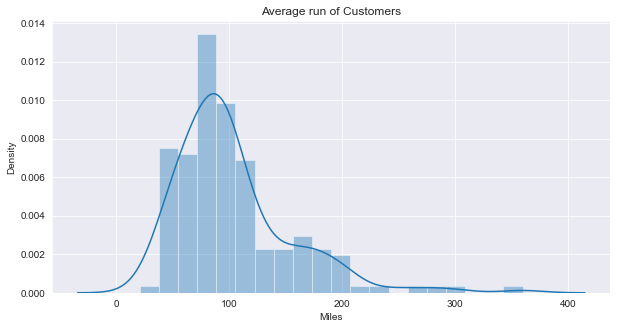

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
r = sns.distplot(df['Miles']).set(title='Average run of Customers')
plt.show()

## ..................................................................

#### 3.1.2 Distribution of Income of customers:-

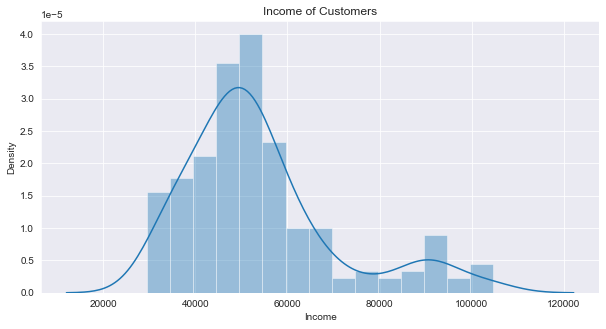

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
r = sns.distplot(df['Income']).set(title='Income of Customers')
plt.show()

## .............................................................

#### 3.1.3 Distribution of Male and Female incomes :-

In [25]:
df_males = df[df['Gender']=='Male']
df_females = df[df['Gender']=='Female']

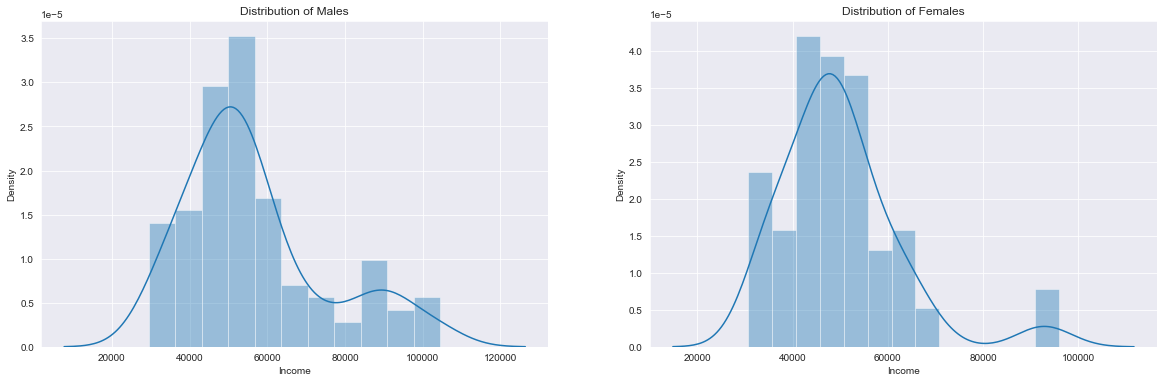

In [26]:
fig, axes = plt.subplots(1, 2,figsize=(20,6))
sns.distplot(df_males['Income'],ax=axes[0]).set(title='Distribution of Males')
sns.distplot(df_females['Income'],ax=axes[1]).set(title='Distribution of Females')
plt.show()

## .............................................................

#### 3.1.4 Distribution of Miles of Male and Female :-

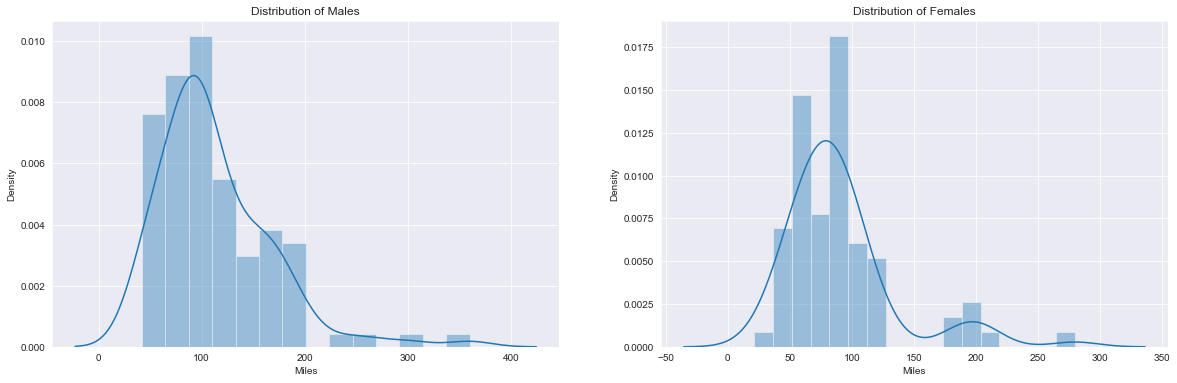

In [27]:
fig, axes = plt.subplots(1, 2,figsize=(20,6))
sns.distplot(df_males['Miles'],ax=axes[0]).set(title='Distribution of Males')
sns.distplot(df_females['Miles'],ax=axes[1]).set(title='Distribution of Females')
plt.show()

## ..........................................................

#### 3.1.5 Distribution of Products i.e. how much these products used in Miles :-

In [28]:
df_KP281 = df[df['Product']=='KP281']
df_KP481 = df[df['Product']=='KP481']
df_KP781 = df[df['Product']=='KP781']

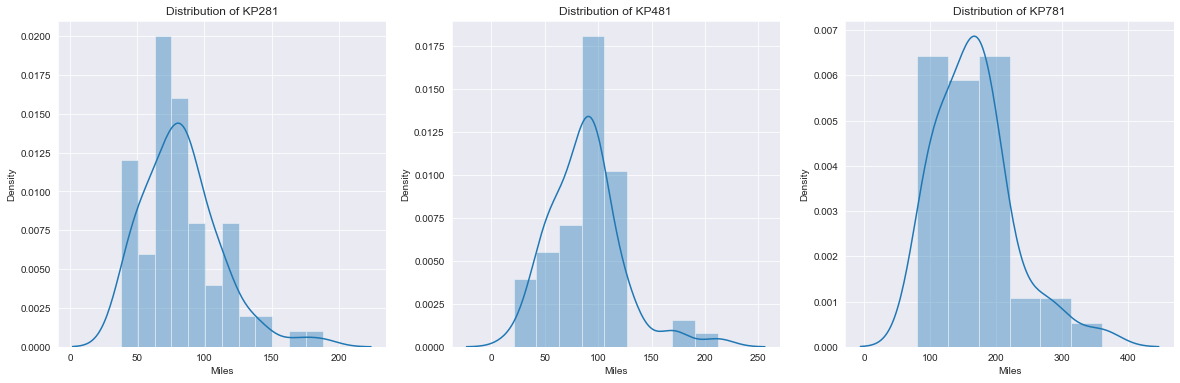

In [29]:
fig, axes = plt.subplots(1, 3,figsize=(20,6))
sns.distplot(df_KP281['Miles'],ax=axes[0]).set(title='Distribution of KP281')
sns.distplot(df_KP481['Miles'],ax=axes[1]).set(title='Distribution of KP481')
sns.distplot(df_KP781['Miles'],ax=axes[2]).set(title='Distribution of KP781')

plt.show()

## ..........................................................

### 3.2 Bi-variate Analysis :
> Here we will compare our features with each other to know how our features are correlated, by doing this analysis we will be able to figure out relationship between features.


## Finding the Outliers in our data :-
> <b>Logic</b> : Where the mean and median are'nt same then we can observe outliers in that case, we can use boxplot to analyse outliers visually. <br><br>

#### 3.2.1 Boxplot for Age group based on miles :-

In [30]:
print('The difference between mean and median of age group(Miles)')
print(df.groupby('Age_group')['Miles'].mean()-df.groupby('Age_group')['Miles'].median())

The difference between mean and median of age group(Miles)
Age_group
Mid_aged    17.055556
Old         15.166667
Young        9.108333
Name: Miles, dtype: float64


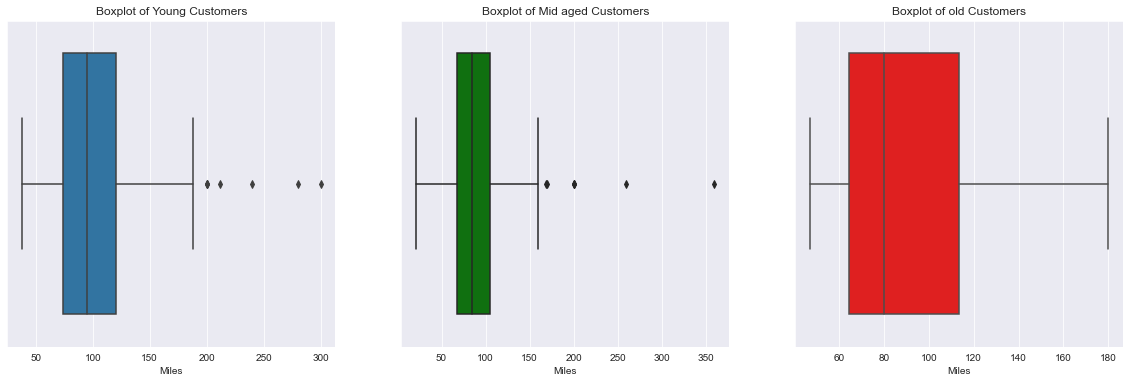

In [31]:
df_Young = df[df['Age_group']=='Young']
df_Mid_aged = df[df['Age_group']=='Mid_aged']
df_Old = df[df['Age_group']=='Old']
# plotting customer age categories : 
fig, axes = plt.subplots(1, 3,figsize=(20,6))
sns.boxplot(df_Young['Miles'],ax=axes[0]).set(title='Boxplot of Young Customers')
sns.boxplot(df_Mid_aged['Miles'],ax=axes[1],color='g').set(title='Boxplot of Mid aged Customers')
sns.boxplot(df_Old['Miles'],ax=axes[2],color='r').set(title='Boxplot of old Customers')
plt.show()

In [32]:
print('The total Old customers are : ',df_Old.shape[0])

The total Old customers are :  6


### Boxplot observation:
> 1. Young customers :- We can observe 5 outliers in this category.<br><br>
> 2. Middle aged customers :- We can observe 4 outliers in this category.<br><br>
> 3. Old custmers :-  We can observe no outliers in this category cause we have only 6 customers that are old.

## ........................................................

#### 3.2.2 Boxplot of Education group based on miles and income :-

In [33]:
df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Education_category,Income_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Tertiary,Lower_class
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Tertiary,Lower_class


In [34]:
print('Difference between mean and median of Education_category based on Miles')
print(df.groupby('Gender')['Income'].mean()
      -df.groupby('Gender')['Income'].median())

Difference between mean and median of Education_category based on Miles
Gender
Female    2074.907895
Male      4260.759615
Name: Income, dtype: float64


In [35]:
df_males= df[df['Gender']=='Male']
df_females= df[df['Gender']=='Female']

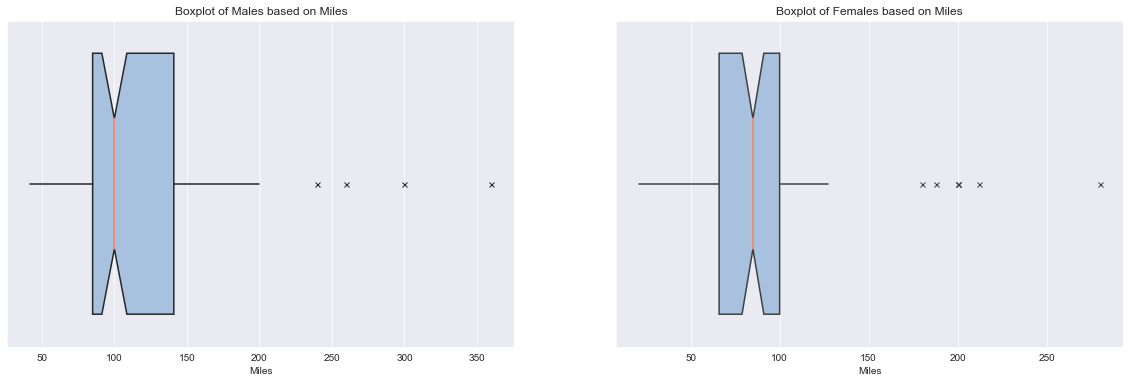

In [36]:
fig, axes = plt.subplots(1, 2,figsize=(20,6))

sns.boxplot(df_males['Miles'],ax=axes[0],
        notch=True, showcaps=False,color='g',
        flierprops={"marker": "x"},
        boxprops={"facecolor": (.4, .6, .8, .5)},
        medianprops={"color": "coral"},).set(title='Boxplot of Males based on Miles')


sns.boxplot(df_females['Miles'],ax=axes[1],
        notch=True, showcaps=False,
        flierprops={"marker": "x"},
        boxprops={"facecolor": (.4, .6, .8, .5)},
        medianprops={"color": "coral"},).set(title='Boxplot of Females based on Miles')
plt.show()

### Boxplot Observation :-
> 1. Males : There are roughly 4 outliers in male.<br><br>
> 2. Females : There are roughly 5 outliers in females.<br><br>

## ..................................................................

#### 3.2.3 Analysing the relationship between products and gender:-

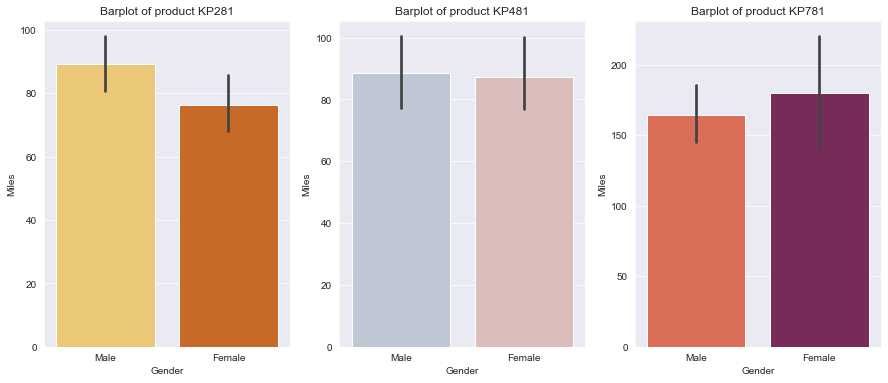

In [37]:
df_KP281 = df[df['Product']=='KP281']
df_KP481 = df[df['Product']=='KP481']
df_KP781 = df[df['Product']=='KP781']
#plotting
fig, axes = plt.subplots(1, 3,figsize=(15,6))
sns.barplot(data = df_KP281,x='Gender',y='Miles',palette = 'YlOrBr',ax=axes[0]).set(title='Barplot of product KP281')
sns.barplot(data=df_KP481,x='Gender',y='Miles',palette = 'vlag',ax=axes[1]).set(title='Barplot of product KP481')
sns.barplot(data=df_KP781,x='Gender',y='Miles',palette = 'rocket_r',ax=axes[2]).set(title='Barplot of product KP781')
plt.show()

### Barplot Observation :-
> 1. Product KP281 : Male uses more and running more using this product.<br><br>
> 2. Product KP481 : Both male and female customers are having same miles.<br><br>
> 3. Product KP781 : Here female tend to use more this product for running.

## ......................................................................

#### 3.2.4 Which income group run more ?:-

[Text(0.5, 1.0, 'Barplot of Female')]

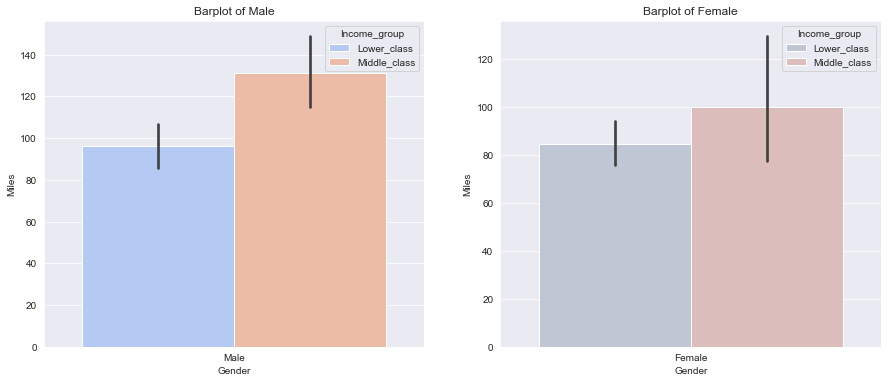

In [38]:
df_males= df[df['Gender']=='Male']
df_females= df[df['Gender']=='Female']
#plotting
fig, axes = plt.subplots(1, 2,figsize=(15,6))
sns.barplot(data=df_males,x='Gender',y='Miles',hue='Income_group',palette='coolwarm',
            ax=axes[0]).set(title='Barplot of Male')
sns.barplot(data=df_females,x='Gender',y='Miles',hue='Income_group',palette='vlag',
            ax=axes[1]).set(title='Barplot of Female')

### Barplot Observation:-
> 1. Male :  We can see that middle class tend to run more. <br><br>
> 2. Female : Middle class female tend to run more.

## ..............................................................

#### 3.2.5 Relatioship between Miles and education category:

In [39]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Education_category,Income_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Tertiary,Lower_class
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Tertiary,Lower_class
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,Tertiary,Lower_class
3,KP281,19,Male,12,Single,3,3,32973,85,Young,Secondary School,Lower_class
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,Tertiary,Lower_class


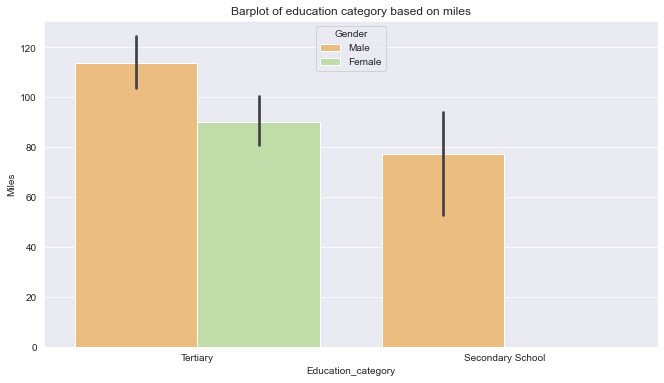

In [40]:

fig, axes = plt.subplots(1, 1,figsize=(11,6))
sns.barplot(data=df,x='Education_category',y='Miles',hue='Gender',palette='Spectral')
plt.title('Barplot of education category based on miles')
plt.show()

### Barplot Observation :-
> 1. Tertiary : We can observe both males and females in this category.<br><br>
> 2. Secondary School : Only males are there in this category.

## ..................................................................

#### 3.2.6 Usage of treadmills gender wise:

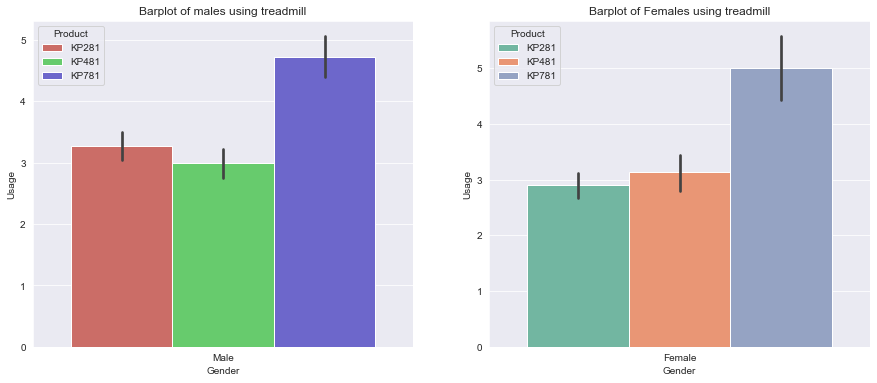

In [41]:
df_males= df[df['Gender']=='Male']
df_females= df[df['Gender']=='Female']
#plotting
fig, axes = plt.subplots(1, 2,figsize=(15,6))
sns.barplot(data=df_males,x='Gender',y='Usage',hue='Product',palette='hls',
            ax=axes[0]).set(title='Barplot of males using treadmill')
sns.barplot(data=df_females,x='Gender',y='Usage',hue='Product',palette='Set2',
            ax=axes[1]).set(title='Barplot of Females using treadmill')
plt.show()

### Barplot Observation :-
> 1. Males : We can see that KP781 is mostly used by males.<br><br>
> 2. Females : KP781 is mostly used by females.

In [42]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Education_category,Income_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Tertiary,Lower_class
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Tertiary,Lower_class
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,Tertiary,Lower_class
3,KP281,19,Male,12,Single,3,3,32973,85,Young,Secondary School,Lower_class
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,Tertiary,Lower_class


## ....................................................................

#### 3.2.7 Effect of marital status on product:

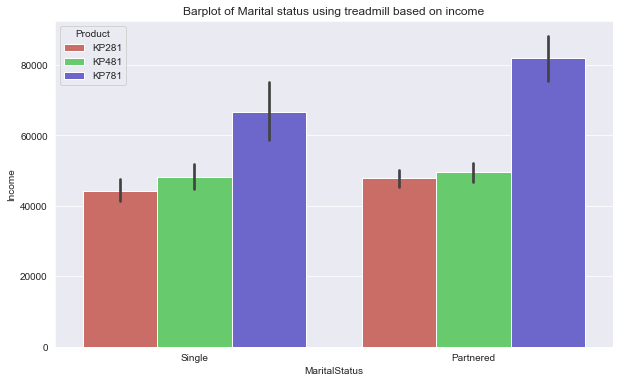

In [43]:

fig, axes = plt.subplots(1, 1,figsize=(10,6))
sns.barplot(data=df,x='MaritalStatus',y='Income',hue='Product',palette='hls',
            ).set(title='Barplot of Marital status using treadmill based on income')
plt.show()

### Barplot Observation :-
> 1. Single : Single customer tend to buy KP281 more. <br><br>
> 2. Patnered : Partnered customer tend to buy KP281 more and spend more than single customers.

## ...............................................................

In [44]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_group,Education_category,Income_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Tertiary,Lower_class
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Tertiary,Lower_class
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,Tertiary,Lower_class
3,KP281,19,Male,12,Single,3,3,32973,85,Young,Secondary School,Lower_class
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,Tertiary,Lower_class


#### 3.2.8 Effect of age purchasing product :-

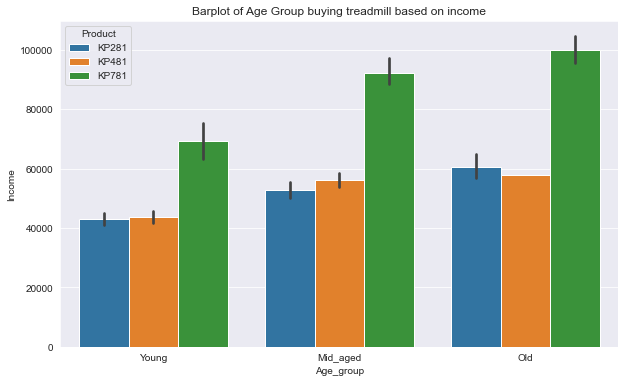

In [45]:
fig, axes = plt.subplots(1, 1,figsize=(10,6))
sns.barplot(data=df,x='Age_group',y='Income',hue='Product',
            ).set(title='Barplot of Age Group buying treadmill based on income')
plt.show()

## ......................................................................

### Pairplot Analysis :-

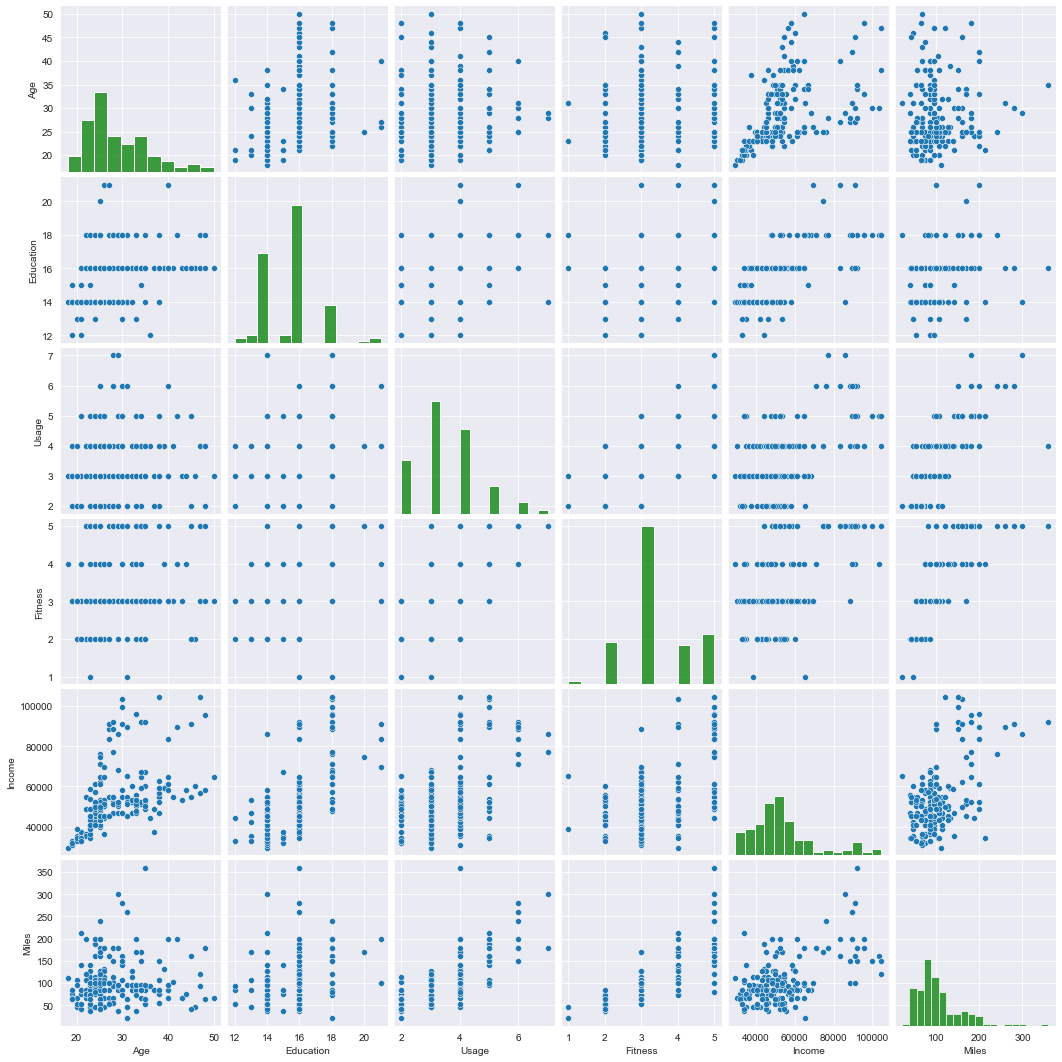

In [46]:
# pairplot
plt.close()
sns.set_style('darkgrid')
sns.pairplot(df,kind='scatter',
             diag_kind='hist',diag_kws={'color':'green'})
plt.show()

### Pairplot Observation :-
> 1. Income and Age : As age increased we can see income tends to increase, like an upward trend.<br><br>
> 2. Education and Income : Customers with 18 year on education have more income.<br><br>
> 3. Fitness and Miles : Customers running more are more fit.
> 

## ........................................................................

### Heatmap :-
> Logic : We need to find which all categories are the reason for more number of treadmill purchase so we will modify our data.

In [47]:
# relationship between education and number of product purchases:-
df_education = df.groupby('Education')['Product'].count()
df_education = df_education.reset_index('Education')
df_education = df_education.set_index('Education')

# relationship between Fitness group and number of product purchases :-
df_fitness = df.groupby('Fitness')['Product'].count()
df_fitness = df_fitness.reset_index('Fitness')
df_fitness = df_fitness.set_index('Fitness')

# Relationship between age and number of product purchases:-
df_age_group = df.groupby('Age_group')['Product'].count()
df_age_group = df_age_group.reset_index('Age_group')
df_age_group = df_age_group.set_index('Age_group')

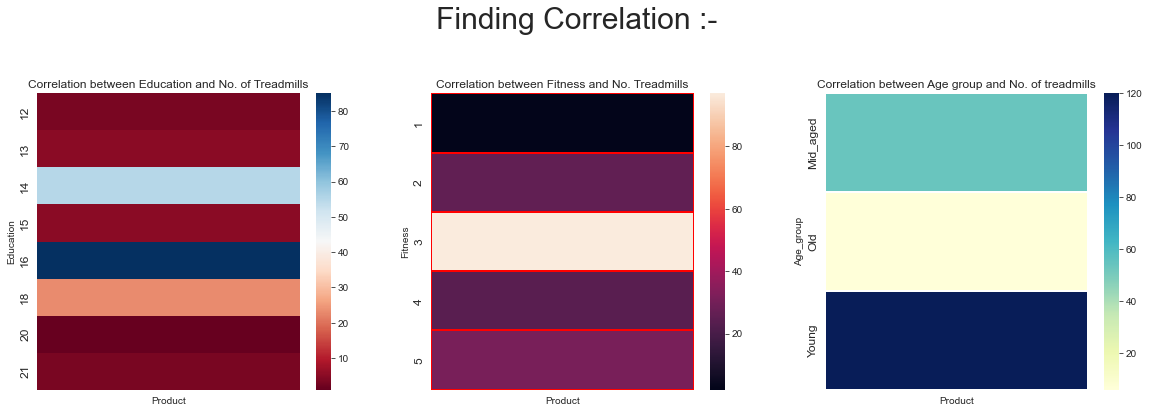

In [48]:
plt.figure(figsize=(20,12)).suptitle('Finding Correlation :-',fontsize=30)
# plot - barplot
plt.subplot(2, 3, 1)
sns.heatmap(df_education,cmap='RdBu')
plt.yticks(fontsize=12)
plt.title('Correlation between Education and No. of Treadmills')

# plot - boxplot
plt.subplot(2, 3, 2)
sns.heatmap(df_fitness,linewidth =.1,linecolor ="red")
plt.yticks(fontsize=12)
plt.title('Correlation between Fitness and No. Treadmills')

# plot - violin plot
plt.subplot(2, 3, 3)
sns.heatmap(df_age_group,linewidth =.1,cmap="YlGnBu")
plt.yticks(fontsize=12)
plt.title('Correlation between Age group and No. of treadmills')
plt.show()

### Heatmap Observation:-
> 1. Education and No. of Treadmills : We can see that customers having 16 years of education purchased more products. <br><br>
> 2. Fitness and No. Treadmills : Customers who have a fitness of 3 are using the most number of treadmills.<br><br>
> 3. Age group and No. of treadmills : Young customers are purchasing most of our treadmills.

# ---------------------------------------------------------

# 4. <ins>Contingency Table Analysis</ins> :-

### 4.1 Product and Gender analysis :

In [49]:
a = df['Product']
Gender = df['Gender']
pd.crosstab(a,Gender,rownames=['Products'],colnames=['Gender'],margins=True)

Gender,Female,Male,All
Products,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


#### Ques 1 : Percentage of customers purchased KP281,KP481,KP781 ?

In [50]:
print('% of customers purchases KP281 = ',round(100*80/180,2),'%')
print('% of customers purchases KP481 = ',round(100*60/180,2),'%')
print('% of customers purchases KP781 = ',round(100*40/180,2),'%')

% of customers purchases KP281 =  44.44 %
% of customers purchases KP481 =  33.33 %
% of customers purchases KP781 =  22.22 %


#### Ques 2 : Percentage of customers purchases treadmills(category wise) given they're female?

In [51]:
print('% of Females purchases KP281 = ',round(100*40/76,2),'%')
print('% of Females purchases KP481 = ',round(100*29/76,2),'%')
print('% of Females purchases KP781 = ',round(100*7/76,2),'%')

% of Females purchases KP281 =  52.63 %
% of Females purchases KP481 =  38.16 %
% of Females purchases KP781 =  9.21 %


#### Ques 3 : Percentage of customers purchases treadmills(category wise) given they're male?

In [52]:
print('% of Males purchases KP281 = ',round(100*40/104,2),'%')
print('% of Males purchases KP481 = ',round(100*31/104,2),'%')
print('% of Males purchases KP781 = ',round(100*33/104,2),'%')

% of Males purchases KP281 =  38.46 %
% of Males purchases KP481 =  29.81 %
% of Males purchases KP781 =  31.73 %


## .....................................................................

### 4.2 Product and Marital Status analysis :-

In [53]:
a = df['Product']
MaritalStatus = df['MaritalStatus']
pd.crosstab(a,MaritalStatus,rownames=['Products'],colnames=['MaritalStatus'],margins=True)

MaritalStatus,Partnered,Single,All
Products,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


#### Ques : Percentage of customers purchased treadmill(category wise) given Partnered ?

In [54]:
print('% of Partnered purchased KP281 = ',round(100*48/107,2),'%')
print('% of Partnered purchased KP481 = ',round(100*36/107,2),'%')
print('% of Partnered purchased KP781 = ',round(100*23/107,2),'%')

% of Partnered purchased KP281 =  44.86 %
% of Partnered purchased KP481 =  33.64 %
% of Partnered purchased KP781 =  21.5 %


#### Ques : Percentage of customers purchased treadmill(category wise) given Single ?

In [55]:
print('% of Singles purchased KP281 = ',round(100*32/73,2),'%')
print('% of Singles purchased KP481 = ',round(100*24/73,2),'%')
print('% of Singles purchased KP781 = ',round(100*17/73,2),'%')

% of Singles purchased KP281 =  43.84 %
% of Singles purchased KP481 =  32.88 %
% of Singles purchased KP781 =  23.29 %


## Note: 
> We can many more such analysis like this and can make useful business decisions.

# --------------------------------------------------

# 5. <ins>Insights</ins> :-

### From Non Graphical Analysis :-
> 1.The total males are 104 and total females are 76 showing that majority of our customers are males.<br><br>
> 2. We have 107 customers that are partnered compared to 73 that are single customers and again showing that married customers are our majority customers.<br><br>
> 3. We have 120 customers that are young and signifying that we have 50% of customers that belong to young category.<br><br>
> 4. KP281 treadmills have 80 customers which is the majorly used.<br><br>
> 5. The mean and median of age group are quite similar showing that there is less chance of outliers in this category.<br><br>
> 6. The mean and median of income group depicts some outliers:- Eg: Mean(middle_class)-Median(middle_class) have some deviations and there's a chance of having outliers here.<br><br>
> 7. Similary we can observe outliers in case age group based on miles.

### From Graphical Analysis :-
> 1. Average run of customers is some kind of bell curve showing that majority customers run.<br><br>
> 2. Distribution of income shows that majority customers income lie between 30k to 70k.<br><br>
> 3. From boxplot we found the outliers in the Age group and there are 5 outliers in Young customers and maybe these customers tend to run more and similarly there are 4 outliers in Middle aged customers depicting these customers tend to run more.<br><br>
> 4. From boxplot of gender, we found out that males have roughly 4 outliers and females have roughly 5 outliers indicating these customers tend to run more have high miles status.<br><br>
> 5. From Barplot of product and gender : For product KP281 we have more male users and for product KP781 we have more female users.<br><br>
> 6. From Barplot of education category : Customers from tertiary category tend to run more and have divsersified user ie males and females where secondary school customers don't have female user.<br><br>
> 7. From Barplot of treadmills ; Both male and female use KP781 more as compared to other treadmills.<br><br>
> 8. From pairplot :We can see that income and age,Education and income,Fitness and mile are correlated with each other.<br><br>
> 9. Correlation/Heatmap : we can find relationship of features which are responsible for more treadmill usage.

# ----------------------------------------------------

# 6. <ins>Recommendations</ins> :-

### For Females :-
> 1. Female users are using KP281 52.63 % and for these female users we can provide them good offers and can increase our sales.<br><br>
> 2. For treadmill KP781, Females are using less and we can fill up a survey form to know the limitation of this product and modify it.<br><br>
> 3. Since female users are less than males and here company can introduce female fitness schemes so that it could attract more female user.

### For Males :-
> 1. Males are using more KP281 treadmill followed by KP781 and KP481, here we can add male specific features in the treadmill like more speed with advance features.<br><br>
> 2. Again we can add exciting offers for male category also.

### For Married and Single user :-
> 1. Both married and single user tend to use KP281 and we can provide gift vouchers for married users like holiday vacations etc if they use more of our products.<br><br>
> 2. Since treadmill KP781 is less used by both the categories and here we need some serious improvisation in this product cause in all cases its performance is not admirable.


### For Young, Mid aged, Old users :-
> 1. For young users we have high customer participation and in this category we should try to give discounts cause young customers cannot purchase expensive products.<br><br>
> 2. We have very low participation of Old users cause they cannot use treadmill and we should provide some other product to old user according to their needs.<br><br>
> 3. Again mid age users have okiesh customer participation and we can try to increase this customer segment by analysing what kind of features they want in the treadmill.

# ---------------------------------------------------
